# Plotting function for Allen-Cahn

In [6]:
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np


In [30]:
real_mf = sio.loadmat('results/MFWNO_Allen_Cahn_n20.mat')['real_mf'] 
output_mf_wno = sio.loadmat('results/MFWNO_Allen_Cahn_n20.mat')['output_mf'] 
output_hf_wno = sio.loadmat('results/MFWNO_Allen_Cahn_n20.mat')['output_hf'] 
output_mf_deeponet = sio.loadmat('results/MFDeeponet_Allen_Cahn_n20.mat')['output_mf'] 


In [24]:
real_mf.shape

(4000, 50, 65, 65)

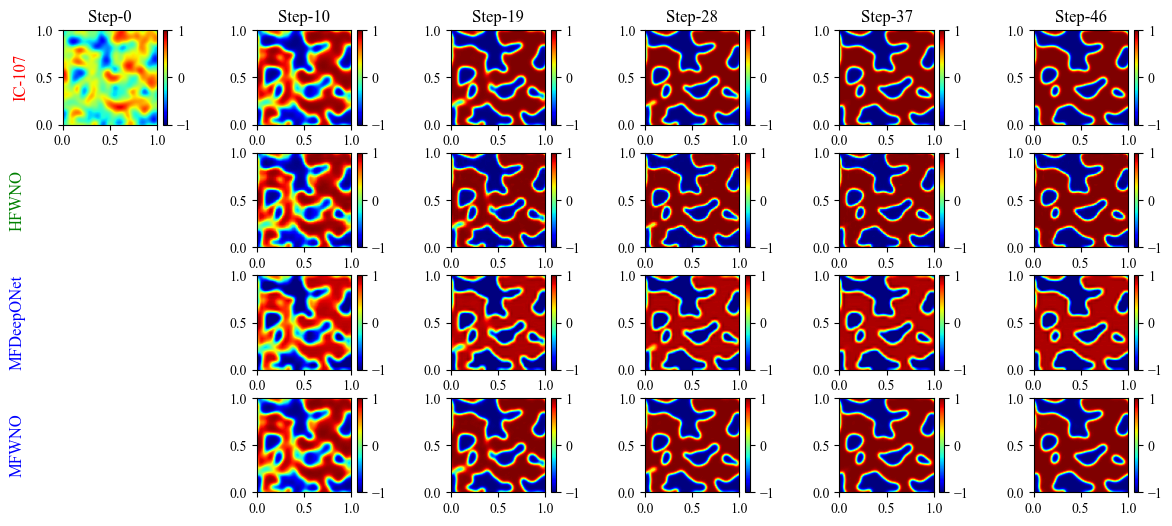

In [41]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 10

fig6, ax = plt.subplots(nrows=4, ncols=6, figsize=(14, 6))
plt.subplots_adjust(hspace=0.30, wspace=0.7)

sample = 107
index = 1

im = ax[0,0].imshow(real_mf[sample,0,:,:], extent=[0,1,0,1], interpolation='Gaussian',
                                vmin=-1, vmax=1, cmap='jet')
ax[0,0].set_title('Step-0')
ax[0,0].set_ylabel('IC-{}'.format(sample), color='r', fontsize=12)
plt.colorbar(im, ax=ax[0,0], orientation="vertical", fraction=0.046, pad=0.05)
ax[1,0].set_ylabel('HFWNO', labelpad=20, color='g', fontsize=12); 
ax[1,0].set(frame_on=False); ax[1,0].get_xaxis().set_ticks([]); ax[1,0].get_yaxis().set_ticks([])
ax[2,0].set_ylabel('MFDeepONet', labelpad=20, color='b', fontsize=12); 
ax[2,0].set(frame_on=False); ax[2,0].get_xaxis().set_ticks([]); ax[2,0].get_yaxis().set_ticks([])
ax[3,0].set_ylabel('MFWNO', labelpad=20, color='b', fontsize=12); 
ax[3,0].set(frame_on=False); ax[3,0].get_xaxis().set_ticks([]); ax[3,0].get_yaxis().set_ticks([])
            
for i in range(50):
    if i % 9 == 0 and i != 0:
        im = ax[0,index].imshow(real_mf[sample,i,:,:], extent=[0,1,0,1], interpolation='Gaussian',
                                vmin=-1, vmax=1, cmap='jet')
        ax[0,index].set_title('Step-{}'.format(i+1));
        plt.colorbar(im, ax=ax[0,index], orientation="vertical", fraction=0.046, pad=0.05)

        im = ax[1,index].imshow(output_hf_wno[sample,i,:,:], extent=[0,1,0,1],
                                vmin=-1, vmax=1, cmap='jet')
        plt.colorbar(im, ax=ax[1,index], orientation="vertical", fraction=0.046, pad=0.05)

        im = ax[2,index].imshow(output_mf_deeponet[sample,i,:,:], extent=[0,1,0,1], interpolation='Gaussian',
                                vmin=-1, vmax=1, cmap='jet')
        plt.colorbar(im, ax=ax[2,index], orientation="vertical", fraction=0.046, pad=0.05)

        im = ax[3,index].imshow(output_mf_wno[sample,i,:,:], extent=[0,1,0,1], interpolation='Gaussian',
                                vmin=-1, vmax=1, cmap='jet')
        plt.colorbar(im, ax=ax[3,index], orientation="vertical", fraction=0.046, pad=0.05)
        index += 1

fig6.savefig('Prediction_AC.pdf', format='pdf', dpi=100, bbox_inches='tight')  
